In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm
tqdm.pandas()

In [2]:
csv_akam = "C:/Business analysis/Project/IS403.O22.HTCLL_Nhom07/Dataset/AKAM_Stock.csv"
df_akam = pd.read_csv(csv_akam, thousands=',')

In [3]:
df_akam.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2/1/2019,AKAM,65.519997,65.519997,65.540001,64.500000,65.000000,1426900
1,2/4/2019,AKAM,67.040001,67.040001,67.080002,65.589996,65.589996,1146300
2,2/5/2019,AKAM,68.169998,68.169998,68.300003,67.279999,67.309998,1474300
3,2/6/2019,AKAM,67.510002,67.510002,68.500000,67.480003,68.089996,1379200
4,2/7/2019,AKAM,66.589996,66.589996,67.150002,65.889999,67.110001,1047600


In [4]:
df_akam.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1.295000e+03
mean,98.405035,98.405035,99.424965,97.340371,98.370108,1.576752e+06
std,13.741631,13.741631,13.840541,13.667938,13.776701,9.350920e+05
min,65.519997,65.519997,65.540001,64.500000,65.000000,2.774000e+05
25%,88.125000,88.125000,88.815002,87.000000,87.840000,1.043050e+06
50%,99.669998,99.669998,101.239998,98.500000,99.529999,1.353100e+06
75%,110.185001,110.185001,111.575001,108.990002,110.119999,1.797750e+06
max,128.320007,128.320007,129.169998,126.980003,128.550003,1.077170e+07


In [5]:
df_akam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1295 non-null   object 
 1   Symbol     1295 non-null   object 
 2   Adj Close  1295 non-null   float64
 3   Close      1295 non-null   float64
 4   High       1295 non-null   float64
 5   Low        1295 non-null   float64
 6   Open       1295 non-null   float64
 7   Volume     1295 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 81.1+ KB


In [6]:
# Convert object to datetime64
df_akam['Date'] = df_akam['Date'].apply(pd.to_datetime)
# Sort data by date time value
df_akam = df_akam.sort_values(by="Date").reset_index(drop=True)
df_akam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1295 non-null   datetime64[ns]
 1   Symbol     1295 non-null   object        
 2   Adj Close  1295 non-null   float64       
 3   Close      1295 non-null   float64       
 4   High       1295 non-null   float64       
 5   Low        1295 non-null   float64       
 6   Open       1295 non-null   float64       
 7   Volume     1295 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 81.1+ KB


In [7]:
df_akam.Close

0        65.519997
1        67.040001
2        68.169998
3        67.510002
4        66.589996
           ...    
1290    107.790001
1291    109.599998
1292    109.150002
1293    108.970001
1294    108.559998
Name: Close, Length: 1295, dtype: float64

In [8]:
df_akam['Prev_close'] = df_akam.shift(1)['Close']
df_akam.Prev_close

0              NaN
1        65.519997
2        67.040001
3        68.169998
4        67.510002
           ...    
1290    107.870003
1291    107.790001
1292    109.599998
1293    109.150002
1294    108.970001
Name: Prev_close, Length: 1295, dtype: float64

In [9]:
df_akam.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Prev_close
0,2019-02-01,AKAM,65.519997,65.519997,65.540001,64.500000,65.000000,1426900,NaN
1,2019-02-04,AKAM,67.040001,67.040001,67.080002,65.589996,65.589996,1146300,65.519997
2,2019-02-05,AKAM,68.169998,68.169998,68.300003,67.279999,67.309998,1474300,67.040001
3,2019-02-06,AKAM,67.510002,67.510002,68.500000,67.480003,68.089996,1379200,68.169998
4,2019-02-07,AKAM,66.589996,66.589996,67.150002,65.889999,67.110001,1047600,67.510002


In [10]:
df_akam['Close_change'] = df_akam.progress_apply(
    lambda row: 0 if np.isnan(row.Prev_close) else row.Close - row.Prev_close,
    axis = 1
)

  0%|          | 0/1295 [00:00<?, ?it/s]

In [11]:
df_akam.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Prev_close,Close_change
0,2019-02-01,AKAM,65.519997,65.519997,65.540001,64.500000,65.000000,1426900,NaN,0.000000
1,2019-02-04,AKAM,67.040001,67.040001,67.080002,65.589996,65.589996,1146300,65.519997,1.520004
2,2019-02-05,AKAM,68.169998,68.169998,68.300003,67.279999,67.309998,1474300,67.040001,1.129997
3,2019-02-06,AKAM,67.510002,67.510002,68.500000,67.480003,68.089996,1379200,68.169998,-0.659996
4,2019-02-07,AKAM,66.589996,66.589996,67.150002,65.889999,67.110001,1047600,67.510002,-0.920006


In [12]:
rows = []
for _,row in tqdm(df_akam.iterrows(), total=df_akam.shape[0]):
    row_data = dict(
        day = row.Date.day,
        month = row.Date.month,
        year = row.Date.year,
        open = row.Open,
        low = row.Close,
        high = row.High, 
        close = row.Close, 
        volume = row.Volume,
        close_change = row.Close_change
    )
    rows.append(row_data)
features_akam = pd.DataFrame(rows)

  0%|          | 0/1295 [00:00<?, ?it/s]

In [13]:
features_akam.head()

,day,month,year,open,low,high,close,volume,close_change
0,1,2,2019,65.000000,65.519997,65.540001,65.519997,1426900,0.000000
1,4,2,2019,65.589996,67.040001,67.080002,67.040001,1146300,1.520004
2,5,2,2019,67.309998,68.169998,68.300003,68.169998,1474300,1.129997
3,6,2,2019,68.089996,67.510002,68.500000,67.510002,1379200,-0.659996
4,7,2,2019,67.110001,66.589996,67.150002,66.589996,1047600,-0.920006


In [14]:
def detect_outlier(df, col):
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(df[(df[col] < lower_bound) | (df[col] > upper_bound)])

In [15]:
detect_outlier(features_akam, 'close')

Empty DataFrame
Columns: [day, month, year, open, low, high, close, volume, close_change]
Index: []


In [16]:
detect_outlier(features_akam, 'volume')

      day  month  year        open         low        high       close   
8      13      2  2019   70.349998   70.370003   71.199997   70.370003  \
61      1      5  2019   86.010002   81.040001   86.190002   81.040001   
97     21      6  2019   79.809998   78.550003   80.000000   78.550003   
124    31      7  2019   85.000000   88.129997   90.760002   88.129997   
125     1      8  2019   88.120003   90.110001   90.360001   90.110001   
...   ...    ...   ...         ...         ...         ...         ...   
1268   15      2  2024  114.199997  111.570000  114.669998  111.570000   
1269   16      2  2024  111.050003  109.190002  112.110001  109.190002   
1272   22      2  2024  108.470001  106.949997  108.709999  106.949997   
1282    7      3  2024  111.839996  112.830002  113.139999  112.830002   
1288   15      3  2024  108.279999  107.250000  108.900002  107.250000   

       volume  close_change  
8     4038100      1.040001  
61    4597600      0.980003  
97    3469700     -1.

In [17]:
detect_outlier(features_akam, 'close_change')

      day  month  year        open         low        high       close   
124    31      7  2019   85.000000   88.129997   90.760002   88.129997  \
127     5      8  2019   86.559998   84.010002   86.949997   84.010002   
134    14      8  2019   88.080002   84.080002   88.080002   84.080002   
266    24      2  2020   97.099998   97.110001   98.540001   97.110001   
267    25      2  2020   97.620003   93.730003   98.320000   93.730003   
...   ...    ...   ...         ...         ...         ...         ...   
1017   15      2  2023   81.529999   78.660004   81.529999   78.660004   
1075   10      5  2023   83.199997   85.540001   86.500000   85.540001   
1137    9      8  2023  101.500000  102.989998  107.470001  102.989998   
1267   14      2  2024  119.120003  114.800003  122.000000  114.800003   
1268   15      2  2024  114.199997  111.570000  114.669998  111.570000   

       volume  close_change  
124   4730100      4.099998  
127   2371300     -4.309998  
134   5810800     -5.

In [18]:
train_size = int(0.7 * len(features_akam))
test_size = int(0.2 * len(features_akam))
val_size = len(features_akam) - train_size - test_size

train_akam_df = features_akam[:train_size]
test_akam_df = features_akam[train_size:train_size+test_size]
validation_akam_df = features_akam[train_size+test_size:]

In [19]:
#Quá trình Training
x_train = np.array(train_akam_df.index).reshape(-1, 1)
y_train = np.array(train_akam_df['close'])
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
# In các thông số của mô hình
print("Hệ số hồi quy (slope):", model.coef_)
print("Sai số chệch (intercept):", model.intercept_)

Hệ số hồi quy (slope): [0.03539519]
Sai số chệch (intercept): 83.41793648225385


In [20]:
#Quá trình testing
x_test = np.array(test_akam_df.index).reshape(-1, 1)
y_test = np.array(test_akam_df['close'])
y_pred = model.predict(x_test)

#Quá trình Validate
x_val= np.array(validation_akam_df.index).reshape(-1, 1)
y_val = np.array(validation_akam_df['close'])
y_pred_val =  model.predict(x_val)

In [21]:
#Quá trình tạo index predict 30 ngày tiếp theo
last_index = features_akam.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[129.25470936 129.29010456 129.32549975 129.36089494 129.39629013
 129.43168532 129.46708051 129.5024757  129.5378709  129.57326609
 129.60866128 129.64405647 129.67945166 129.71484685 129.75024204
 129.78563724 129.82103243 129.85642762 129.89182281 129.927218
 129.96261319 129.99800838 130.03340357 130.06879877 130.10419396
 130.13958915 130.17498434 130.21037953 130.24577472 130.28116991]


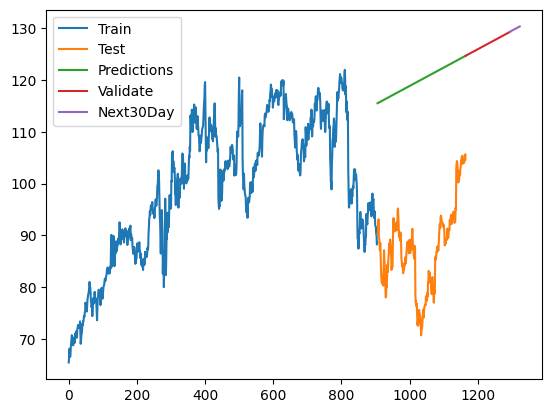

In [22]:
#Vẽ hình
plt.plot(train_akam_df.index, train_akam_df['close'])
plt.plot(test_akam_df.index, test_akam_df['close'])
plt.plot(test_akam_df.index, y_pred)
plt.plot(validation_akam_df.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()